Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2013,5,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2014-09-16,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,BTC-USD
2014-09-17,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,BTC-USD
2014-09-18,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,BTC-USD
2014-09-19,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,BTC-USD
2014-09-20,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,BTC-USD
...,...,...,...,...,...,...,...
2021-07-23,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,2.166471e+10,BTC-USD
2021-07-24,34290.292969,35364.925781,33881.835938,35350.187500,35350.187500,2.085669e+10,BTC-USD
2021-07-25,35384.031250,40499.675781,35287.312500,37337.535156,37337.535156,5.102213e+10,BTC-USD
2021-07-26,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,3.509737e+10,BTC-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2507 entries, 2014-09-16 to 2021-07-27
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2503 non-null   float64
 1   high      2503 non-null   float64
 2   low       2503 non-null   float64
 3   close     2503 non-null   float64
 4   adjclose  2503 non-null   float64
 5   volume    2503 non-null   float64
 6   ticker    2507 non-null   object 
 7   spread    2503 non-null   float64
dtypes: float64(7), object(1)
memory usage: 176.3+ KB


## Plot the closing value of bitcoin over time

Text(0.5, 1.0, 'Closing price distribution of BTC')

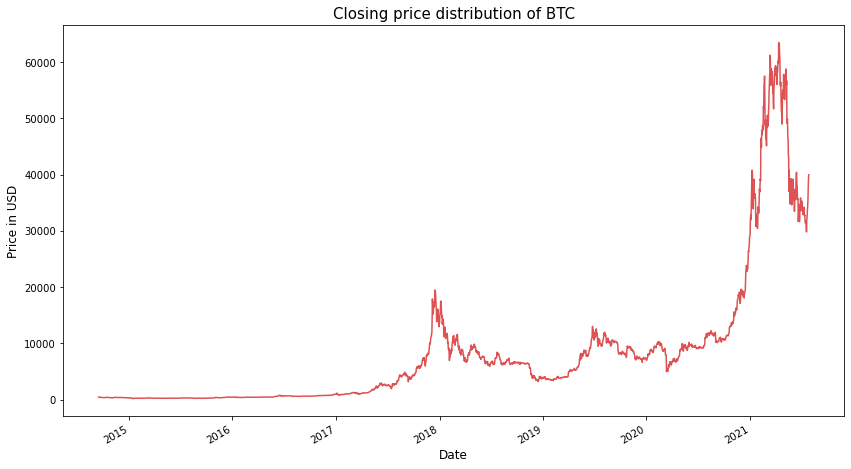

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of BTC", fontsize=15)

Text(0.5, 1.0, 'Daily price spread of BTC')

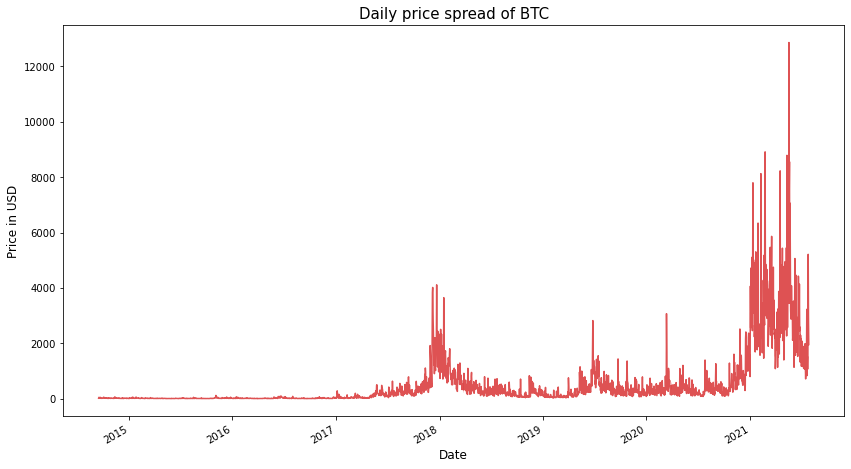

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of BTC", fontsize=15)

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
temp_base_df

,open,high,low,close,adjclose,volume,ticker
2014-09-16,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,BTC-USD
2014-09-17,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,BTC-USD
2014-09-18,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,BTC-USD
2014-09-19,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,BTC-USD
2014-09-20,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,BTC-USD
...,...,...,...,...,...,...,...
2021-07-23,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,2.166471e+10,BTC-USD
2021-07-24,34290.292969,35364.925781,33881.835938,35350.187500,35350.187500,2.085669e+10,BTC-USD
2021-07-25,35384.031250,40499.675781,35287.312500,37337.535156,37337.535156,5.102213e+10,BTC-USD
2021-07-26,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,3.509737e+10,BTC-USD


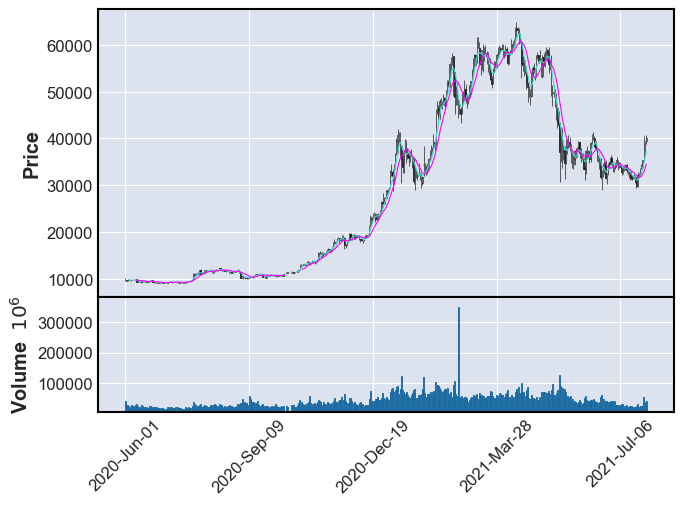

In [7]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [8]:
from fbprophet import Prophet

In [9]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2014-09-16,457.334015
1,2014-09-17,424.440002
2,2014-09-18,394.795990
3,2014-09-19,408.903992
4,2014-09-20,398.821014
...,...,...
2502,2021-07-23,34292.445312
2503,2021-07-24,35350.187500
2504,2021-07-25,37337.535156
2505,2021-07-26,39406.941406


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2525,2021-08-22,44472.836851,40672.446565,48391.983826
2526,2021-08-23,44471.355368,40242.970502,48193.206115
2527,2021-08-24,44477.103155,40743.811205,48380.859202
2528,2021-08-25,44528.917618,40438.973728,47963.800139
2529,2021-08-26,44536.730659,40381.045786,48400.508027


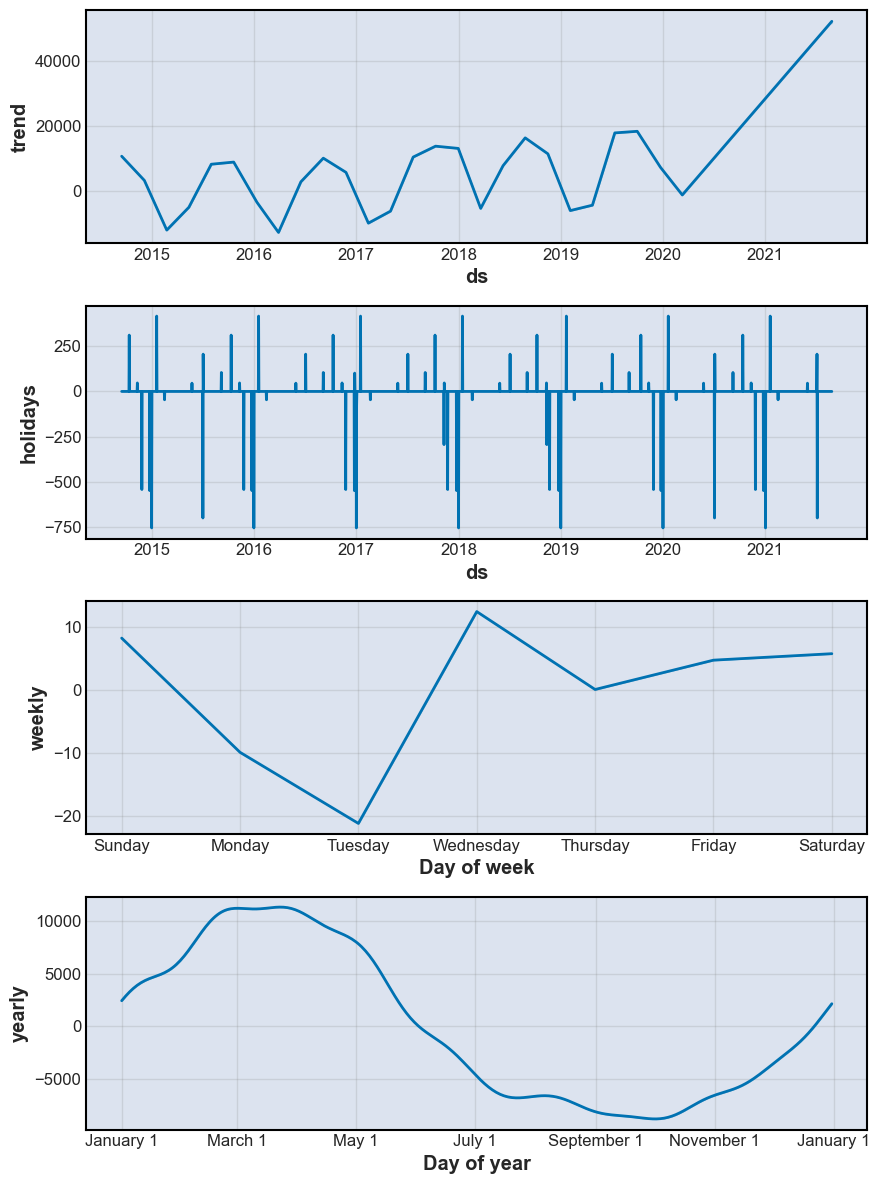

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

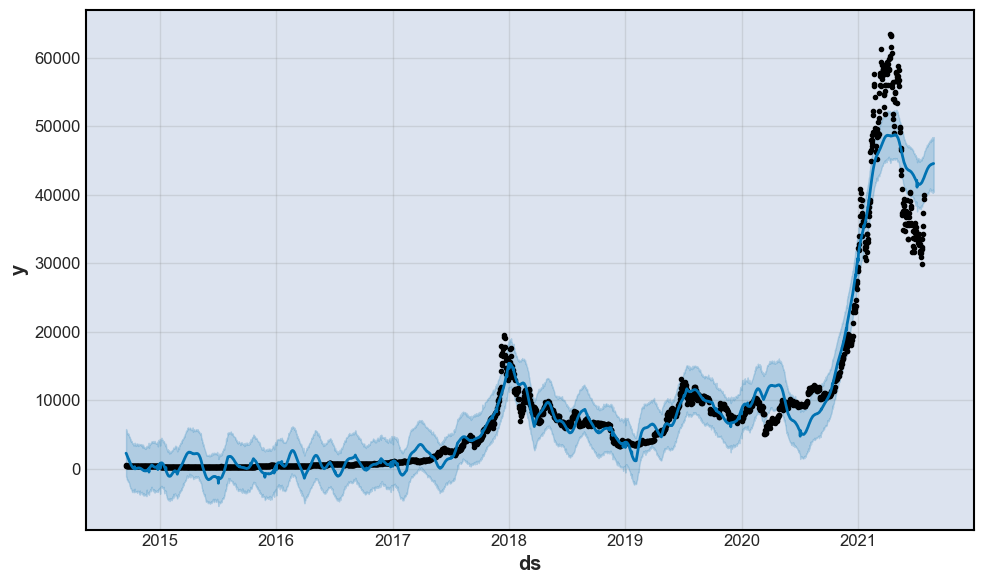

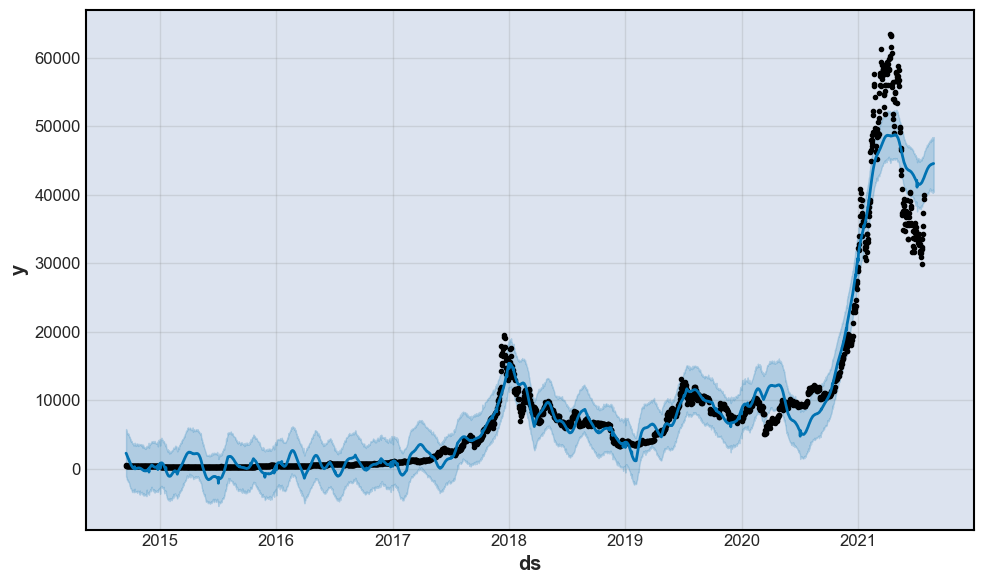

In [11]:
m.plot(forecast)